In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [8]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [9]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [10]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.head().style.set_properties(subset = ['FullDate'], **{'background-color' : 'dodgerblue'})

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.800000,1688.215000,3.690000,23.710000
1,2010-09-01 01:00:00,15.800000,1669.195000,3.690000,22.635000
2,2010-09-01 02:00:00,15.800000,1491.980000,3.690000,22.565000
3,2010-09-01 03:00:00,15.800000,1330.760000,3.690000,18.910000
4,2010-09-01 04:00:00,15.800000,1247.940000,3.690000,18.030000


In [11]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [12]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [15]:
df1 = df.rename(columns = {'FullDate' : 'ds', 'ElecPrice': 'y'})
df1.head(4)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910


In [16]:
 df1.set_index('ds', inplace =True)

In [17]:
df_daily = df1.resample('D').sum()
df_daily.head(2)

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.38,88.56,2751.70
2010-09-02,369.6,38898.99,88.56,570.81


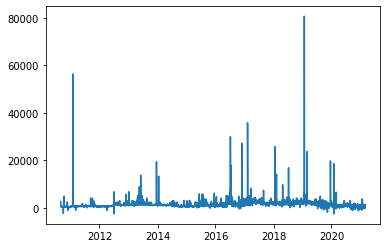

In [18]:
plt.plot(df_daily.index, df_daily.y)

In [19]:
df1.corr()

,Tmax,SysLoad,GasPrice,y
Tmax,1.000000,-0.009796,0.030173,0.002126
SysLoad,-0.009796,1.000000,-0.214574,0.138690
GasPrice,0.030173,-0.214574,1.000000,0.157768
y,0.002126,0.138690,0.157768,1.000000


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tmax      92016 non-null  float64
 1   SysLoad   92016 non-null  float64
 2   GasPrice  92016 non-null  float64
 3   y         92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [21]:
df2 = df1.drop(columns = ['Tmax', 'SysLoad', 'GasPrice'])
df2.head(4)

,y
ds,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910


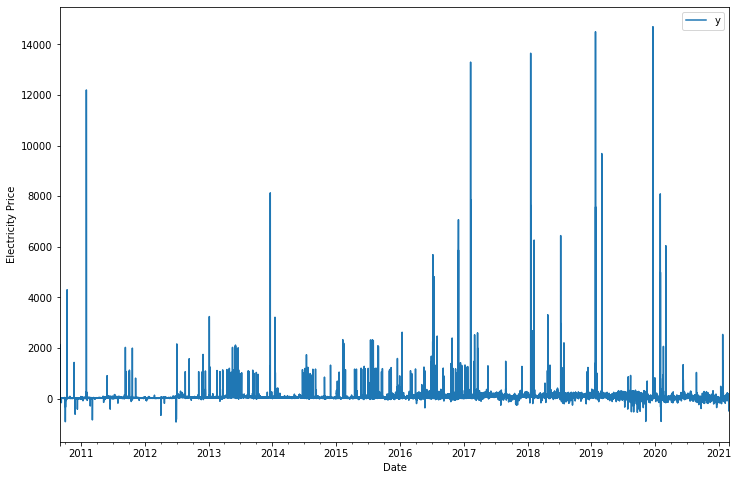

In [22]:
ax = df2.plot(figsize = (12, 8))
ax.set_ylabel('Electricity Price')
ax.set_xlabel('Date')
plt.show()

In [23]:
#Resample to daily data
df_daily = df1.resample('D').sum()
df_daily.head(2)

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.38,88.56,2751.70
2010-09-02,369.6,38898.99,88.56,570.81


In [24]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adf_result = adfuller(df2['y'])

In [27]:
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used : 91962
Critical Values:


In [28]:
mae = np.mean(np.abs(forecast['yhat'] - test['y']))
mse = np.mean((forecast['yhat'] - test['y'])**2)
rmse = np.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

NameError: ignored

In [29]:
#forecast = model.predict(test)

In [30]:
#predict daily  for the next 12 months
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)
forecast.head()

NameError: ignored

In [31]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

In [32]:
#Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): #actual =y_true, pred =y_pred
    y_true, y_pred = np.array(y_true), np.array(y_pred)#
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100